# The Simpsons Character - Image Classification

# Abstract

The convolutional neural network (CNN) is a class of deep learning neural networks. CNNs represent a huge breakthrough in image recognition. They're most commonly used to analyze visual imagery and are frequently working behind the scenes in image classification. CNN or ConvNet are complex feed forward neural network used for image classification and recognition because of its high accuracy. 

### Dataset

The Simpsons Character Classification consists of 42 characters with 9099 images on the whole in the training dataset and the test set consists of 990 images. 
Link - https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/kernels?sortBy=voteCount&group=everyone&pageSize=20&datasetId=1408
It consists of characters such as 'abraham_grampa_simpson','agnes_skinner','apu_nahasapeemapetilon','barney_gumble','bart_simpson','carl_carlson',
              'charles_montgomery_burns','chief_wiggum','cletus_spuckler','comic_book_guy', 'disco_stu',
              'edna_krabappel','fat_tony','gil','groundskeeper_willie', 'homer_simpson','kent_brockman','krusty_the_clown',
              'lenny_leonard','lionel_hutz','lisa_simpson','maggie_simpson','marge_simpson','martin_prince',
              'mayor_quimby','milhouse_van_houten','moe_szyslak','ned_flanders','nelson_muntz',
              'otto_mann','patty_bouvier','principal_skinner','professor_john_frink','rainier_wolfcastle','ralph_wiggum',
              'selma_bouvier','sideshow_bob','sideshow_mel','snake_jailbird','troy_mcclure','waylon_smithers'

# Data Preparation

In [1]:
import os #to iterate through directories
import random
import numpy as np  #array operations
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import scipy.misc
#import cv2 #to perform various image operations
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
import itertools
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from tensorflow.keras import backend
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import model_from_json

import warnings

warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dict_characters = {0: 'abraham_grampa_simpson', 1: 'agnes_skinner', 2: 'apu_nahasapeemapetilon', 3: 'barney_gumble', 
4: 'bart_simpson', 5: 'carl_carlson', 6:  'charles_montgomery_burns', 7: 'chief_wiggum', 8: 'cletus_spuckler',9: 'comic_book_guy', 
10: 'disco_stu', 11: 'edna_krabappel', 12: 'fat_tony', 13: 'gil', 14: 'groundskeeper_willie', 15: 'homer_simpson',
16: 'kent_brockman', 17: 'krusty_the_clown', 18: 'lenny_leonard', 19: 'lionel_hutz', 20: 'lisa_simpson', 21: 'maggie_simpson',
22: 'marge_simpson', 23: 'martin_prince', 24: 'mayor_quimby', 25: 'milhouse_van_houten', 26: 'miss_hoover', 27: 'moe_szyslak',
28: 'ned_flanders', 29: 'nelson_muntz', 30: 'otto_mann',31: 'patty_bouvier',32: 'principal_skinner',
33: 'professor_john_frink', 34: 'rainier_wolfcastle', 35: 'ralph_wiggum', 36: 'selma_bouvier', 37: 'sideshow_bob',
38: 'sideshow_mel', 39: 'snake_jailbird', 40: 'troy_mcclure', 41: 'waylon_smithers' }

In [3]:
img_size = 64

In [4]:
from os import listdir
directory_name = "C:/Python/.ipynb_checkpoints/simpsons_dataset"

In [5]:
def load_train_set(dirname,dict_characters):
   X = []
   y = []
   training_data = []
   for label,character in dict_characters.items():
       list_images = os.listdir(dirname+'/'+character)
       for image_name in list_images[0:400]:
           image = scipy.misc.imread(dirname+'/'+character+'/'+image_name)
           new_image = scipy.misc.imresize(image,(img_size,img_size),interp='lanczos')
           X.append(scipy.misc.imresize(image,(img_size,img_size),interp='lanczos'))
           y.append(label)
           training_data.append([np.array(new_image),np.array(label)])
   return np.array(X), np.array(y), np.array(training_data)
X, y, data  = load_train_set("C:/Python/.ipynb_checkpoints/simpsons_dataset", dict_characters) 

In [6]:
print(len(data))

9099


### Shuffling the train data --

In [7]:
import random
random.shuffle(data)

In [8]:
img_size = 64
X1 = []
y1 = []
for X,y in data:
    X1.append(X)
    y1.append(y)
    
X1 = np.array(X1).reshape(-1,img_size, img_size, 3)
y1 = np.array(y1)

In [9]:
print(X1.shape)
print(y1.shape)

(9099, 64, 64, 3)
(9099,)


### Train-test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.20, random_state=123)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7279, 64, 64, 3) (7279,)
(1820, 64, 64, 3) (1820,)


In [11]:
print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes = len(dict_characters))
y_test = to_categorical(y_test, num_classes = len(dict_characters))


print(y_train.shape)
print(X_train.shape)

Training Data Shape: (7279, 64, 64, 3) (7279, 64, 64, 3)
Testing Data Shape: (1820, 64, 64, 3) (1820, 64, 64, 3)
(7279, 42)
(7279, 64, 64, 3)


In [12]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
print(X_train.shape[0],X_test.shape[0],X_test.shape[1:4], y_test.shape[1:4])

7279 1820 (64, 64, 3) (42,)


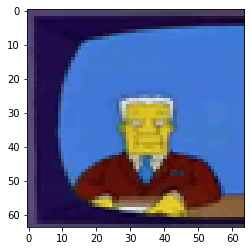

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[130], cmap = 'gist_gray')

# Data Augmentation

Data Augmentation - Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.It is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.It is a step taken to prevent overfitting in a Neural network.

In [15]:
# Data augmentation - rotate, zoom and shift input images.
generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [16]:
generator.fit(X_train)

In [18]:
X_train.shape

(7279, 64, 64, 3)


# Create and train CNN

In [666]:
img_rows, img_cols = img_size,img_size
input_shape = (img_rows, img_cols,3)
batch_size = 32
num_classes = len(dict_characters)
epochs = 8

## Part A - Model 1

The convolutional neural network i.e., model 1 has 3 convolution layers followed by 3 Max pooling layers of pooling size = (2,2) with Batch Normalisation before every convolution layer.

The first layer of this sequential model is the convolution layer which takes 64,64 images as input and the Kernel size is set to (3,3) along with kernel initializer set to he_normal.
The last layer of this model employs a softmax function to output the probabilities of the 42 classes.
This model employs two fully connected layers one of which is the output layer with softmax.
All the layers use the ReLU activation function.
Just before the output layer, a dropout(20%) is used to avoid overfitting of data in the model.

In [667]:
#Creating an object of Sequential class
model1 = tf.keras.models.Sequential()
# Add convolution 2D
model1.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer = 'he_normal',
                  input_shape=(img_size, img_size, 3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())

model1.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())

model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

For model 1, the Stochastic Descent Gradient i.e., SGD optimizer is used.
Categorical Crossentropy is used to calculate the loss of the model while training and categorical accuracy gives the training accuracy at every epoch.
The model is trained for 8 epochs with the training data and a batch size of 32 and the loss and accuracy are calculated at every epoch.                                    

Stochastic Descent Gradient- Includes support for momentum, learning rate decay, and Nesterov momentum.
Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent. The learning rate is a hyper parameter that controls how much to change the model in response to the estimated error each time the model weights are updated.Momentum and Nesterov Momentum (also called Nesterov Accelerated Gradient/NAG) are slight variations of normal gradient descent that can speed up training and improve convergence significantly.

Crossentropy is the default loss function used for multi class classification.Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0. Cross-entropy can be specified as the loss function in Keras by specifying ‘categorical_crossentropy‘ when compiling the model.

In [668]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], optimizer=sgd)
result1 = model1.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 54s 7ms/sample - loss: 1.6981 - categorical_accuracy: 0.5850 - val_loss: 1.5172 - val_categorical_accuracy: 0.6022
Epoch 2/8
7279/7279 [==============================] - 65s 9ms/sample - loss: 0.7142 - categorical_accuracy: 0.8044 - val_loss: 0.8238 - val_categorical_accuracy: 0.7780
Epoch 3/8
7279/7279 [==============================] - 64s 9ms/sample - loss: 0.3816 - categorical_accuracy: 0.8934 - val_loss: 0.9190 - val_categorical_accuracy: 0.7736
Epoch 4/8
7279/7279 [==============================] - 66s 9ms/sample - loss: 0.1979 - categorical_accuracy: 0.9434 - val_loss: 0.6302 - val_categorical_accuracy: 0.8665
Epoch 5/8
7279/7279 [==============================] - 64s 9ms/sample - loss: 0.1133 - categorical_accuracy: 0.9679 - val_loss: 0.5398 - val_categorical_accuracy: 0.8934
Epoch 6/8
7279/7279 [==============================] - 64s 9ms/sample - loss: 0.0595 - categorical_acc

In [675]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [676]:
loss, accuracy = model1.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 2s 1ms/sample - loss: 0.5165 - categorical_accuracy: 0.8995
0.5165281082861699 0.89945054


The accuracy of this model is 89.9% for the above mentioned layers and parameters with a loss of 0.516.

In [677]:
CATEGORIES = ['abraham_grampa_simpson','agnes_skinner','apu_nahasapeemapetilon','barney_gumble','bart_simpson','carl_carlson',
              'charles_montgomery_burns','chief_wiggum','cletus_spuckler','comic_book_guy', 'disco_stu',
              'edna_krabappel','fat_tony','gil','groundskeeper_willie', 'homer_simpson','kent_brockman','krusty_the_clown',
              'lenny_leonard','lionel_hutz','lisa_simpson','maggie_simpson','marge_simpson','martin_prince',
              'mayor_quimby','milhouse_van_houten','moe_szyslak','ned_flanders','nelson_muntz',
              'otto_mann','patty_bouvier','principal_skinner','professor_john_frink','rainier_wolfcastle','ralph_wiggum',
              'selma_bouvier','sideshow_bob','sideshow_mel','snake_jailbird','troy_mcclure','waylon_smithers']

### Making Predictions on out of sample data

In [678]:
import cv2
def prepare(filepath):
    img_size = 64
    img_array=cv2.imread(filepath)
    new_array = cv2.resize(img_array,(img_size,img_size))
    return new_array.reshape(-1,img_size,img_size,3)

pred1 = model1.predict(prepare("C:/Python/.ipynb_checkpoints/kaggle_simpson_testset/simpson_dataset/lisa_simpson_34.jpg"))
print(pred)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [679]:
pred = model1.predict(prepare("C:/Python/.ipynb_checkpoints/kaggle_simpson_testset/simpson_dataset/abraham_grampa_simpson_34.jpg"))
print(CATEGORIES[int(pred1[0][0])])

abraham_grampa_simpson


In [680]:
pred2 = model1.predict(prepare("C:/Python/.ipynb_checkpoints/kaggle_simpson_testset/simpson_dataset/marge_simpson_5.jpg"))
print(CATEGORIES[int(pred2[0][0])])

abraham_grampa_simpson


Abraham_grampa_simpson is being correctly predicted but where as merge_simpson is not being correctly predicted. Further  Modifying the layers, activation functions, network_architecture, network initializers, etc to properly train the model.

# Part B - Activation function
### Model2 

Same as Model 1 but changing the activation function to Elu.
Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes. Softmax function is used for a Classification problem to compute the probabilites for the classes

In [681]:
#Creating an object of Sequential class
model2 = tf.keras.models.Sequential()
# Add convolution 2D
model2.add(Conv2D(32, kernel_size = (3, 3), activation='elu',kernel_initializer = 'he_normal' ,
                  input_shape=(img_size, img_size, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(64, kernel_size=(3, 3),activation='elu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())

model2.add(Conv2D(64, kernel_size=(3, 3),activation='elu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='elu'))
model2.add(Dense(num_classes, activation='softmax'))

In [682]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], optimizer=sgd)
result2 = model2.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 67s 9ms/sample - loss: 1.8936 - categorical_accuracy: 0.5373 - val_loss: 1.5050 - val_categorical_accuracy: 0.5874
Epoch 2/8
7279/7279 [==============================] - 74s 10ms/sample - loss: 0.8677 - categorical_accuracy: 0.7660 - val_loss: 0.8527 - val_categorical_accuracy: 0.7907
Epoch 3/8
7279/7279 [==============================] - 80s 11ms/sample - loss: 0.5011 - categorical_accuracy: 0.8637 - val_loss: 0.7501 - val_categorical_accuracy: 0.8225
Epoch 4/8
7279/7279 [==============================] - 69s 10ms/sample - loss: 0.3031 - categorical_accuracy: 0.9156 - val_loss: 0.6279 - val_categorical_accuracy: 0.8538
Epoch 5/8
7279/7279 [==============================] - 70s 10ms/sample - loss: 0.1796 - categorical_accuracy: 0.9456 - val_loss: 0.6065 - val_categorical_accuracy: 0.8780
Epoch 6/8
7279/7279 [==============================] - 70s 10ms/sample - loss: 0.0989 - categorica

In [683]:
loss, accuracy = model2.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 3s 2ms/sample - loss: 0.5993 - categorical_accuracy: 0.8929
0.5992832878461251 0.89285713


### Accuracy plot Model 1 vs Model 2

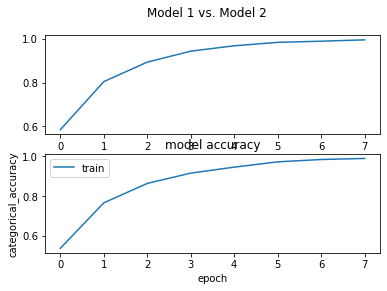

In [684]:

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(result1.history['categorical_accuracy'])
ax2.plot(result2.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

For the model 1, the training accuracy plot depicts how the training accuracy for model 1 increases with the number of epochs and reaches a plateau during the final epochs. This shows that model 1 reaches a desired accuracy within 8 epochs.

Same as model 1, training accuracy plot for the model 2 increases with the number of epochs thereby reaching a stable accuracy within the 8 epochs.

### Loss Value Plot - Model 1 vs. Model 2

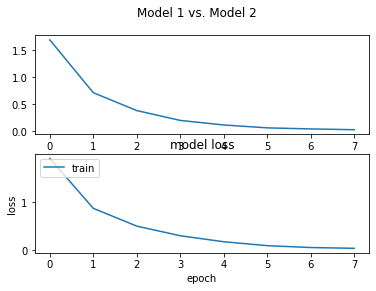

In [685]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(result1.history['loss'])
ax2.plot(result2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The loss value curves for model 1 stabilizes during the last few epochs of the entire duration of the training process same as  the loss value curves of the model 2 which plateaus during the entire training process.


Here, we see that changing activation function to elu decreases the accuracy to 89.2%, slight increase in loss = 0.599 as compared to the activation function relu and softmax which gave an accuracy of about 89.9% with loss function = 0.516 Hence, we make use of relu and softmax as activation function.

## Part C - Changing cost function to Kullback Leibler Divergence Loss

KL Divergence, is a measure of how one probability distribution differs from a baseline distribution.

A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.

In [686]:
epochs = 8
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer = 'he_normal' ,
                 input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [687]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.kullback_leibler_divergence,metrics = [metrics.categorical_accuracy], optimizer=sgd)
res = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 59s 8ms/sample - loss: 1.7111 - categorical_accuracy: 0.5740 - val_loss: 1.4292 - val_categorical_accuracy: 0.6236
Epoch 2/8
7279/7279 [==============================] - 60s 8ms/sample - loss: 0.7470 - categorical_accuracy: 0.7971 - val_loss: 0.7939 - val_categorical_accuracy: 0.7863
Epoch 3/8
7279/7279 [==============================] - 62s 9ms/sample - loss: 0.3838 - categorical_accuracy: 0.8950 - val_loss: 0.7436 - val_categorical_accuracy: 0.8044
Epoch 4/8
7279/7279 [==============================] - 58s 8ms/sample - loss: 0.2253 - categorical_accuracy: 0.9341 - val_loss: 0.6058 - val_categorical_accuracy: 0.8599
Epoch 5/8
7279/7279 [==============================] - 56s 8ms/sample - loss: 0.1180 - categorical_accuracy: 0.9685 - val_loss: 0.5490 - val_categorical_accuracy: 0.8863
Epoch 6/8
7279/7279 [==============================] - 57s 8ms/sample - loss: 0.0716 - categorical_acc

In [688]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 4s 2ms/sample - loss: 0.5497 - categorical_accuracy: 0.8967
0.5497096499898931 0.8967033


Here, changing cost function to kullback_leibler_divergence leads to the test accuracy of 89.6% that is slightly lesser than the cross entropy cost function which was 89.9% . Now, let us use both kullback_leibler_divergence and cross entropy as our loss function and change the number of epochs to see its effect on the accuracy.

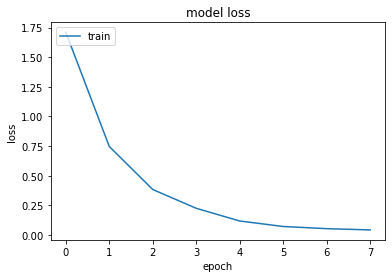

In [696]:
fig, (ax1) = plt.subplots(1)
ax1.plot(res.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

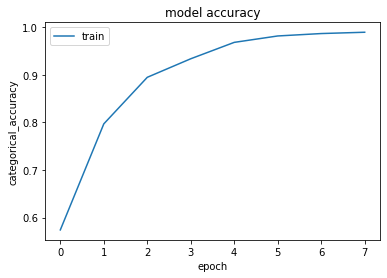

In [697]:
fig, (ax1) = plt.subplots(1)
ax1.plot(res.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Both the accuracy and loss for this model on changing cost function to Kullback Leibler Divergence stabilises after a point of increasing with the number of epochs, but later will see if the effect remains the same after 10 epochs and also lets check if the cost function stabilises with Kullback Leibler Divergence or using cross entropy for 10 epochs.

# PART D - Changing epochs to 10

In [691]:
epochs = 10

In [692]:
# Build and train CNN model
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer = 'he_normal' ,input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [693]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res1 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/10
7279/7279 [==============================] - 61s 8ms/sample - loss: 1.7441 - categorical_accuracy: 0.5616 - val_loss: 1.7896 - val_categorical_accuracy: 0.4951
Epoch 2/10
7279/7279 [==============================] - 65s 9ms/sample - loss: 0.7470 - categorical_accuracy: 0.8008 - val_loss: 0.8754 - val_categorical_accuracy: 0.7676
Epoch 3/10
7279/7279 [==============================] - 58s 8ms/sample - loss: 0.3998 - categorical_accuracy: 0.8880 - val_loss: 0.6629 - val_categorical_accuracy: 0.8390
Epoch 4/10
7279/7279 [==============================] - 61s 8ms/sample - loss: 0.1938 - categorical_accuracy: 0.9457 - val_loss: 0.5923 - val_categorical_accuracy: 0.8775
Epoch 5/10
7279/7279 [==============================] - 59s 8ms/sample - loss: 0.1078 - categorical_accuracy: 0.9714 - val_loss: 0.5522 - val_categorical_accuracy: 0.8824
Epoch 6/10
7279/7279 [==============================] - 58s 8ms/sample - loss: 0.0734 - categoric

In [694]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 4s 2ms/sample - loss: 0.5386 - categorical_accuracy: 0.9060
0.5386457592248917 0.90604395


In [698]:
# Build and train CNN model
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer = 'he_normal' ,input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [699]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.kullback_leibler_divergence,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res_3 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/10
7279/7279 [==============================] - 59s 8ms/sample - loss: 1.7218 - categorical_accuracy: 0.5631 - val_loss: 1.6460 - val_categorical_accuracy: 0.5571
Epoch 2/10
7279/7279 [==============================] - 54s 7ms/sample - loss: 0.7420 - categorical_accuracy: 0.7963 - val_loss: 0.8530 - val_categorical_accuracy: 0.7786
Epoch 3/10
7279/7279 [==============================] - 54s 7ms/sample - loss: 0.3771 - categorical_accuracy: 0.8920 - val_loss: 0.6764 - val_categorical_accuracy: 0.8396
Epoch 4/10
7279/7279 [==============================] - 56s 8ms/sample - loss: 0.2105 - categorical_accuracy: 0.9411 - val_loss: 0.6380 - val_categorical_accuracy: 0.8544
Epoch 5/10
7279/7279 [==============================] - 59s 8ms/sample - loss: 0.0997 - categorical_accuracy: 0.9738 - val_loss: 0.5546 - val_categorical_accuracy: 0.8863
Epoch 6/10
7279/7279 [==============================] - 54s 7ms/sample - loss: 0.0662 - categoric

In [700]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 4s 2ms/sample - loss: 0.5363 - categorical_accuracy: 0.9099
0.5363247164125954 0.9098901


On comparing both the models with cost function with catgeorical cross entropy and kullback_leibler_divergence for 10 epochs

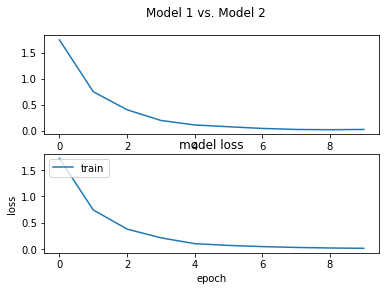

In [701]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(res1.history['loss'])
ax2.plot(res_3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

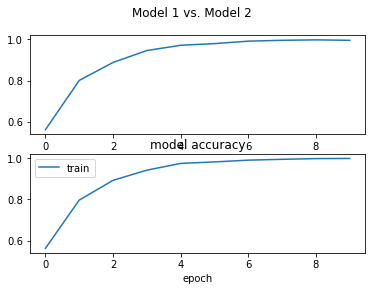

In [702]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(res1.history['categorical_accuracy'])
ax2.plot(res_3.history['categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Increasing the epochs to 10 with loss function as categorical_crossentropy resulted in loss of 0.538 and accuracy plateaus at 90.6% and same goes with kullback_leibler_divergence with accuracy of 90.9% and loss of 0.536 with not much difference in either of the models with 8 or 10 epochs as well as with different loss functions. Hence lets continue with 8 epochs and cost  function - cross_entropy as that of first model with closely similar accuracy of 89.9% and slightly lesser loss of 0.516 compared to the above models.

# Part E : Changing Gradient Estimation to ADAM

ADAM -  Adaptive Adaptive Moment Estimation (Adam) optimizer nearly always works better (faster and more reliably reaching a global minimum) when minimising the cost function in training neural nets. Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

In [705]:
epochs = 8
# Build and train CNN model
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer = 'he_normal' ,input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [706]:
adam= tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=adam)
res_adam = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 62s 9ms/sample - loss: 2.5390 - categorical_accuracy: 0.4422 - val_loss: 1.8412 - val_categorical_accuracy: 0.5209
Epoch 2/8
7279/7279 [==============================] - 60s 8ms/sample - loss: 1.3791 - categorical_accuracy: 0.6405 - val_loss: 1.2608 - val_categorical_accuracy: 0.6797
Epoch 3/8
7279/7279 [==============================] - 54s 7ms/sample - loss: 0.9628 - categorical_accuracy: 0.7431 - val_loss: 1.0311 - val_categorical_accuracy: 0.7429
Epoch 4/8
7279/7279 [==============================] - 54s 7ms/sample - loss: 0.7125 - categorical_accuracy: 0.8041 - val_loss: 1.1083 - val_categorical_accuracy: 0.7566
Epoch 5/8
7279/7279 [==============================] - 53s 7ms/sample - loss: 0.5750 - categorical_accuracy: 0.8362 - val_loss: 1.1450 - val_categorical_accuracy: 0.7687
Epoch 6/8
7279/7279 [==============================] - 52s 7ms/sample - loss: 0.4421 - categorical_acc

In [707]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 3s 2ms/sample - loss: 1.2121 - categorical_accuracy: 0.7593
1.2121171581876147 0.75934064


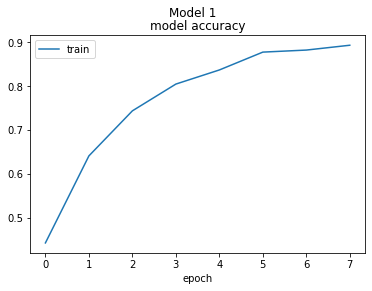

In [708]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model 1')
ax1.plot(res_adam.history['categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

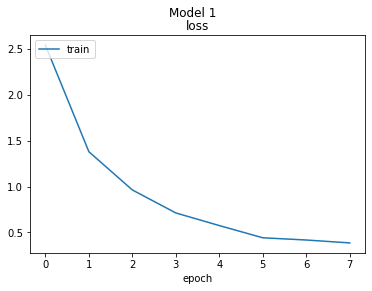

In [709]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model 1')
ax1.plot(res_adam.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Here, we see that the test accuracy decreased to 75.9% and loss increased to 1.212 on using adam optimizer, Also the evalues does not stablilize at any point for the epochs = 8 in comparison with the sgd optimizer that gave us an accuracy of 89.9% with loss of 0.519. Hence, Adam optimizer does not provide better accuracy so it is better to use sgd to configure the learning process. 

Let us now try to change the number of layers in the network architecture and see its impact.

# Part F : Network Architecture
### Changing the number of layers to 2 

In [364]:
# Build and train CNN model
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',
                 kernel_initializer = 'he_normal' ,input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [365]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res4 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,
                 epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 52s 7ms/sample - loss: 1.7401 - categorical_accuracy: 0.5916 - val_loss: 2.8889 - val_categorical_accuracy: 0.3473
Epoch 2/8
7279/7279 [==============================] - 55s 8ms/sample - loss: 0.4319 - categorical_accuracy: 0.8819 - val_loss: 0.9725 - val_categorical_accuracy: 0.7621
Epoch 3/8
7279/7279 [==============================] - 54s 7ms/sample - loss: 0.1122 - categorical_accuracy: 0.9679 - val_loss: 0.8469 - val_categorical_accuracy: 0.8489
Epoch 4/8
7279/7279 [==============================] - 60s 8ms/sample - loss: 0.0289 - categorical_accuracy: 0.9941 - val_loss: 0.7782 - val_categorical_accuracy: 0.8698
Epoch 5/8
7279/7279 [==============================] - 58s 8ms/sample - loss: 0.0096 - categorical_accuracy: 0.9984 - val_loss: 0.8383 - val_categorical_accuracy: 0.8648
Epoch 6/8
7279/7279 [==============================] - 56s 8ms/sample - loss: 0.0046 - categorical_acc

In [366]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 4s 2ms/sample - loss: 0.8303 - categorical_accuracy: 0.8791
0.8302908207034017 0.8791209


The accuracy is 0.87(lower than 89.9 as model 1) and loss of 0.83 (slightly higher than 0.516) same as the one with the three layers as model 1 and hence check if  it has any effect by changing the size of the layers.

In [369]:
# Build and train CNN model
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu',
                 kernel_initializer = 'he_normal' ,input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size = (5, 5), activation='relu',
                 kernel_initializer = 'he_normal' ,input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())


model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [371]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res5 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,
                 epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 43s 6ms/sample - loss: 1.8463 - categorical_accuracy: 0.5252 - val_loss: 1.8854 - val_categorical_accuracy: 0.4764
Epoch 2/8
7279/7279 [==============================] - 43s 6ms/sample - loss: 1.0140 - categorical_accuracy: 0.7258 - val_loss: 1.3947 - val_categorical_accuracy: 0.6198
Epoch 3/8
7279/7279 [==============================] - 44s 6ms/sample - loss: 0.6850 - categorical_accuracy: 0.8165 - val_loss: 0.9322 - val_categorical_accuracy: 0.7731
Epoch 4/8
7279/7279 [==============================] - 43s 6ms/sample - loss: 0.4888 - categorical_accuracy: 0.8659 - val_loss: 0.8364 - val_categorical_accuracy: 0.8016
Epoch 5/8
7279/7279 [==============================] - 39s 5ms/sample - loss: 0.3456 - categorical_accuracy: 0.8989 - val_loss: 1.0128 - val_categorical_accuracy: 0.7808
Epoch 6/8
7279/7279 [==============================] - 41s 6ms/sample - loss: 0.2613 - categorical_acc

In [372]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 3s 1ms/sample - loss: 0.8286 - categorical_accuracy: 0.8412
0.828647819849161 0.8412088


On decreasing the number of layers and increasing the size the accuracy decreased from 89.9% to 84%, loss increased from 0.516 to 0.82, hence continuing with three layers further.

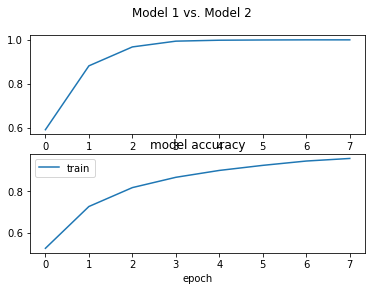

In [373]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(res4.history['categorical_accuracy'])
ax2.plot(res5.history['categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

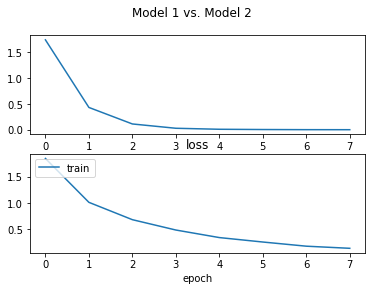

In [374]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(res4.history['loss'])
ax2.plot(res5.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

On increasing the number of layers and changing the size of the layers the accuracy and the loss values plateau after it has reached a point with the increase in th enumber of epochs, also the accuracy values being the same compared to model 1 continuing with model 1 further..

# Part G: Network Initialization

## Changing Network initializer to uniform

In [376]:
epochs = 8
# Build and train CNN model
#Creating an object of Sequential class
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', kernel_initializer = 'uniform' ,
                 input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [377]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res3 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,
                 epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 65s 9ms/sample - loss: 1.8409 - categorical_accuracy: 0.5400 - val_loss: 1.6251 - val_categorical_accuracy: 0.5648
Epoch 2/8
7279/7279 [==============================] - 55s 8ms/sample - loss: 0.8772 - categorical_accuracy: 0.7696 - val_loss: 0.9757 - val_categorical_accuracy: 0.7571
Epoch 3/8
7279/7279 [==============================] - 56s 8ms/sample - loss: 0.5074 - categorical_accuracy: 0.8599 - val_loss: 0.7593 - val_categorical_accuracy: 0.8159
Epoch 4/8
7279/7279 [==============================] - 66s 9ms/sample - loss: 0.3031 - categorical_accuracy: 0.9130 - val_loss: 0.8472 - val_categorical_accuracy: 0.8159
Epoch 5/8
7279/7279 [==============================] - 59s 8ms/sample - loss: 0.1692 - categorical_accuracy: 0.9497 - val_loss: 0.7801 - val_categorical_accuracy: 0.8445
Epoch 6/8
7279/7279 [==============================] - 62s 9ms/sample - loss: 0.0901 - categorical_acc

In [378]:
loss2, accuracy2 = model.evaluate(X_test, y_test, batch_size=32)
print(loss2, accuracy2)

1820/1820 [==============================] - 4s 2ms/sample - loss: 0.7601 - categorical_accuracy: 0.8742
0.7600521409249568 0.87417585


With kernel initializer = uniform, accuracy reduces to 0.87 (from 89.9 as in model1) and loss increases to 0.76 from 0.516, hence trying out different kernel initializer glorot_normal

### Changing the kernel initializer to glorot_normal

In [710]:
model = tf.keras.models.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',kernel_initializer = 'glorot_normal' ,
                 input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [711]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res31 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,
                 epochs=epochs,validation_data=(X_test,y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/8
7279/7279 [==============================] - 57s 8ms/sample - loss: 1.7544 - categorical_accuracy: 0.5597 - val_loss: 1.8245 - val_categorical_accuracy: 0.4967
Epoch 2/8
7279/7279 [==============================] - 52s 7ms/sample - loss: 0.7828 - categorical_accuracy: 0.7883 - val_loss: 0.9426 - val_categorical_accuracy: 0.7533
Epoch 3/8
7279/7279 [==============================] - 52s 7ms/sample - loss: 0.4302 - categorical_accuracy: 0.8823 - val_loss: 0.7362 - val_categorical_accuracy: 0.8275
Epoch 4/8
7279/7279 [==============================] - 51s 7ms/sample - loss: 0.2370 - categorical_accuracy: 0.9332 - val_loss: 0.7432 - val_categorical_accuracy: 0.8593
Epoch 5/8
7279/7279 [==============================] - 51s 7ms/sample - loss: 0.1335 - categorical_accuracy: 0.9607 - val_loss: 0.5725 - val_categorical_accuracy: 0.8830
Epoch 6/8
7279/7279 [==============================] - 52s 7ms/sample - loss: 0.0714 - categorical_acc

In [712]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)


1820/1820 [==============================] - 3s 2ms/sample - loss: 0.6186 - categorical_accuracy: 0.88681s -
0.6186248891956203 0.88681316


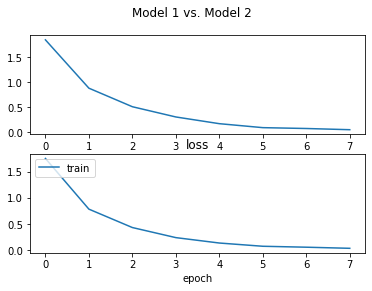

In [713]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(res3.history['loss'])
ax2.plot(res31.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

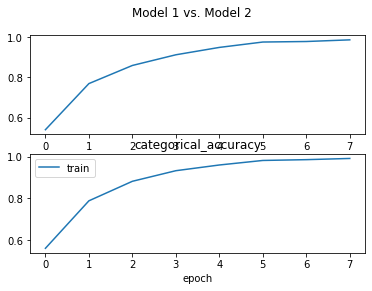

In [714]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(res3.history['categorical_accuracy'])
ax2.plot(res31.history['categorical_accuracy'])
plt.title('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Here the accuracy is less which is 88.6% and loss of 0.618 so we keep the kernel initializer as he_uniform only for our modelling to get best accuracy of 89.9% and test loss of 0.519

To prevent overfitting of the model and just to increase the accuracy of the model, changing the kernel_size, adding dropout layers.,

In [595]:
#Creating an object of Sequential class
model1 = tf.keras.models.Sequential()
epochs = 30
# Add convolution 2D
model1.add(Conv2D(32, kernel_size = (5, 5), activation='relu',kernel_initializer = 'he_normal',
                  padding = 'same', strides = 1,
                  input_shape=(img_size, img_size, 3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())

model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

In [598]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], 
              optimizer=sgd)
res_final = model1.fit(X_train, y_train,batch_size=batch_size,verbose=1,
                 epochs=epochs, validation_data=(X_test, y_test))

Train on 7279 samples, validate on 1820 samples
Epoch 1/30
7279/7279 [==============================] - 97s 13ms/sample - loss: 1.8675 - categorical_accuracy: 0.5319 - val_loss: 1.8445 - val_categorical_accuracy: 0.5242
Epoch 2/30
7279/7279 [==============================] - 98s 13ms/sample - loss: 0.9804 - categorical_accuracy: 0.7405 - val_loss: 0.9910 - val_categorical_accuracy: 0.7467
Epoch 3/30
7279/7279 [==============================] - 94s 13ms/sample - loss: 0.6023 - categorical_accuracy: 0.8365 - val_loss: 0.8473 - val_categorical_accuracy: 0.7962
Epoch 4/30
7279/7279 [==============================] - 100s 14ms/sample - loss: 0.3787 - categorical_accuracy: 0.8898 - val_loss: 0.8562 - val_categorical_accuracy: 0.8176
Epoch 5/30
7279/7279 [==============================] - 102s 14ms/sample - loss: 0.2609 - categorical_accuracy: 0.9247 - val_loss: 0.8285 - val_categorical_accuracy: 0.8313
Epoch 6/30
7279/7279 [==============================] - 94s 13ms/sample - loss: 0.1809 - c

In [599]:
loss, accuracy = model1.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

1820/1820 [==============================] - 3s 2ms/sample - loss: 0.9936 - categorical_accuracy: 0.8703
0.9935831248105227 0.8703297


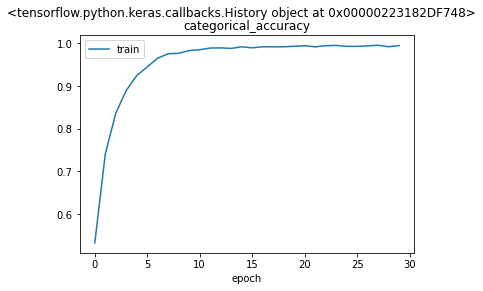

In [600]:
fig, (ax1) = plt.subplots(1)
fig.suptitle(res_final)
ax1.plot(res_final.history['categorical_accuracy'])
plt.title('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

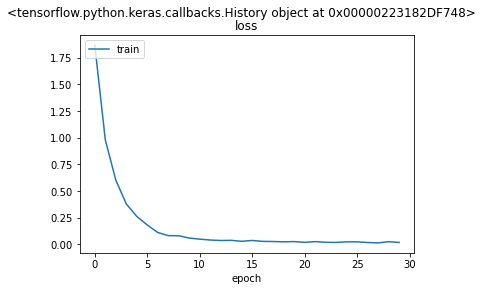

In [601]:
fig, (ax1) = plt.subplots(1)
fig.suptitle(res_final)
ax1.plot(res_final.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Foe epochs = 10, with SGD optimizer, kernel_initilizer = he_normal, activation = relu the loss is 0.99 and accuracy is 0.87 hence considering the best model so far is model 1 with accuracy = 89.9 with a loss of 0.516..

# Conclusions

Acheived best accuracy of 89.9% and a test loss of 0.516 using CNN to classify the Simpsons dataset images by tuning various hyper-parameters and trying out different activation function, epochs, cost functions and even by changing network architecture.

# Readme

Install Python version>= 3.6 and tensorflow using "pip install tensorflow", to install PILLOW ==>  "pip install pillow"
Download the dataset from the link mentioned above, with these installations and the jupyter notebook one should be able to run this file.

# Contributions

Personal contribution: 20%                                                          
External references: 80%

# Citations

1.https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa                                  
2.http://brainmaps.org/index.php?p=speciesdata&species=mus-musculus                                                 
3.https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f                                                                                          
4.https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8                        
5.https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9                                  
6.https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0                         
7.https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/                          
8.https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/                            
9.https://towardsdatascience.com/using-artificial-neural-network-for-image-classification-9df3c34577dd                          
10.https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f                               

11.https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/  


# LICENSE

Copyright 2020, Chaitanya Prasanna Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

​